# Figures from Cure+Survival model

In [1]:
library(ggplot2)
library(cowplot)
library(forcats)
library(dplyr)
library(tidyr)
# Load data for figues
load('fig_data.RData')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
ls()

[1] "dat_p"    "df_auroc" "df_bhat"  "df_conc"  "df_km"

## Figure 1: Leave-one-out AUROC distribution 

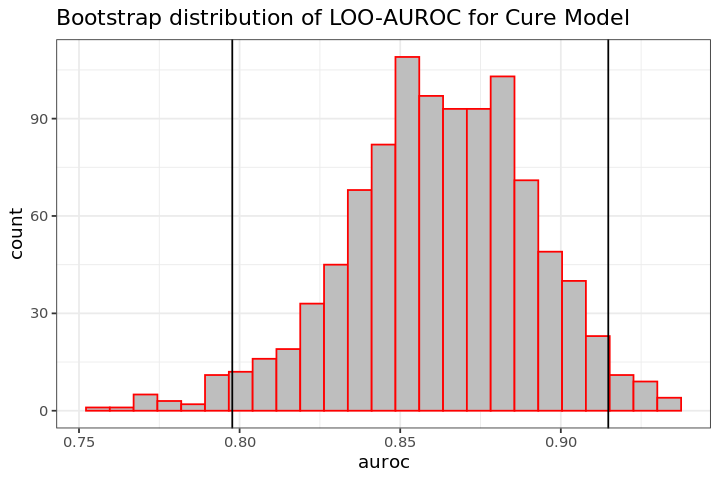

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(df_auroc,aes(x=auroc)) + geom_histogram(fill='grey',color='red',bins=25) + 
  geom_vline(xintercept = quantile(df_auroc$auroc,0.025)) + 
  geom_vline(xintercept = quantile(df_auroc$auroc,0.975)) + 
  theme_bw() + ggtitle('Bootstrap distribution of LOO-AUROC for Cure Model')

## Figure 2: Empirical CDF of cure probabilities

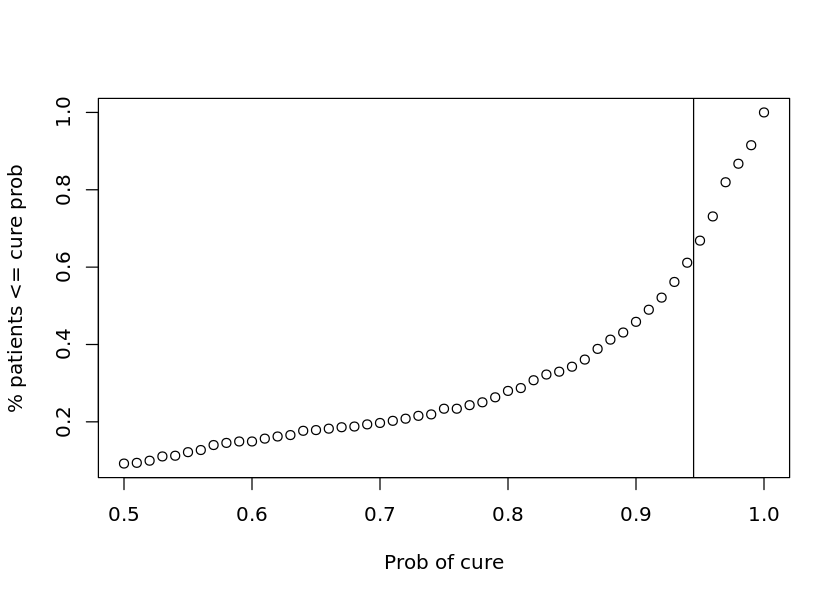

In [4]:
options(repr.plot.width=7, repr.plot.height=5)
plot(dat_p$p, dat_p$m,xlab = 'Prob of cure', ylab = '% patients <= cure prob')
abline(v=0.945)

## Figure 3: Leave-one-out concordance distribution

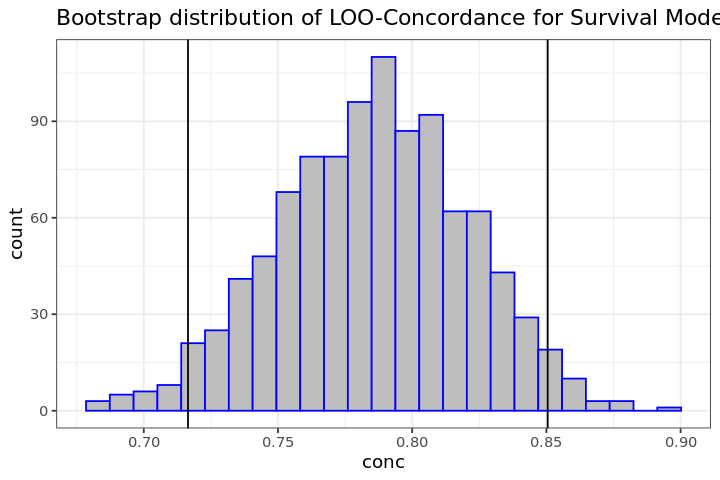

In [5]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(df_conc,aes(x=conc)) + geom_histogram(fill='grey',color='blue',bins=25) + 
  geom_vline(xintercept = quantile(df_conc$conc,0.025)) + 
  geom_vline(xintercept = quantile(df_conc$conc,0.975)) + 
  theme_bw() + ggtitle('Bootstrap distribution of LOO-Concordance for Survival Model')

## Figure 4: Post selection inference

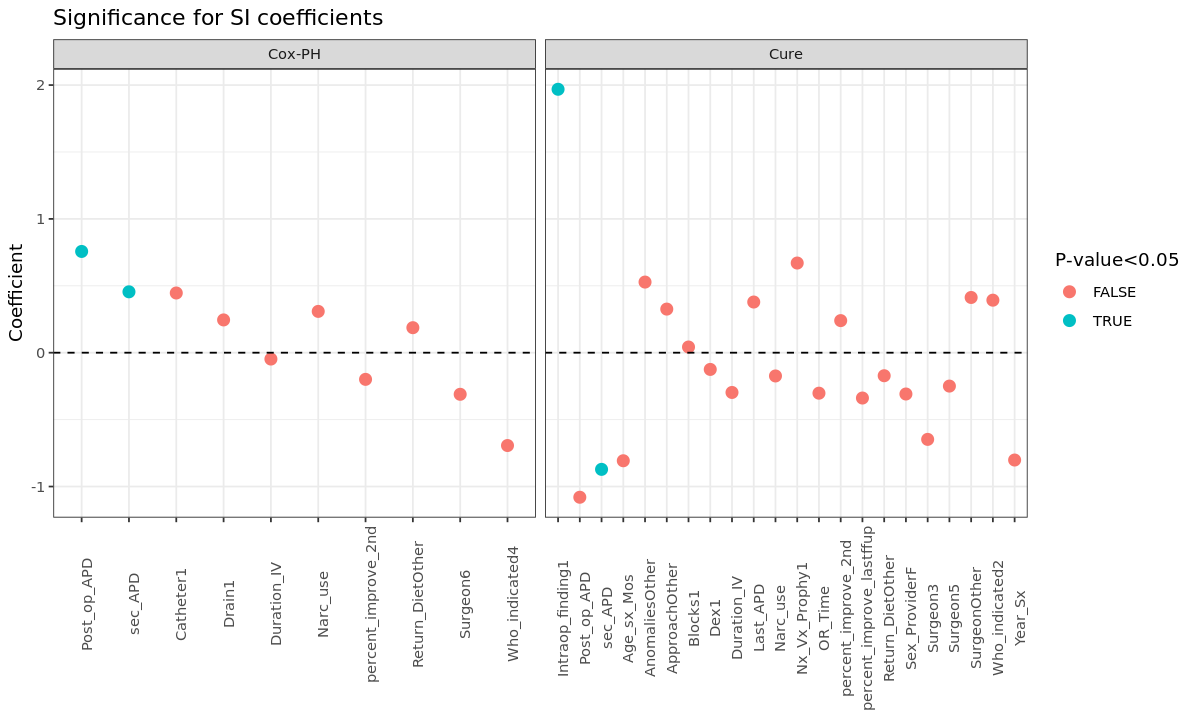

In [6]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(df_bhat, aes(x=fct_reorder2(cn,coef,is_sig), y=coef,color=is_sig)) + 
  geom_point(size=3) + 
  facet_wrap(~tt,scales='free_x',labeller=labeller(tt=c('cox'='Cox-PH','cure'='Cure'))) + 
  theme_bw() + ggtitle('Significance for SI coefficients') + 
  theme(axis.title.x = element_blank(), axis.text.x = element_text(angle=90)) + 
  geom_hline(yintercept = 0, linetype='dashed') + 
  labs(y='Coefficient') + 
  scale_color_discrete(name='P-value<0.05')

## Figure 5: Personalized Medicine

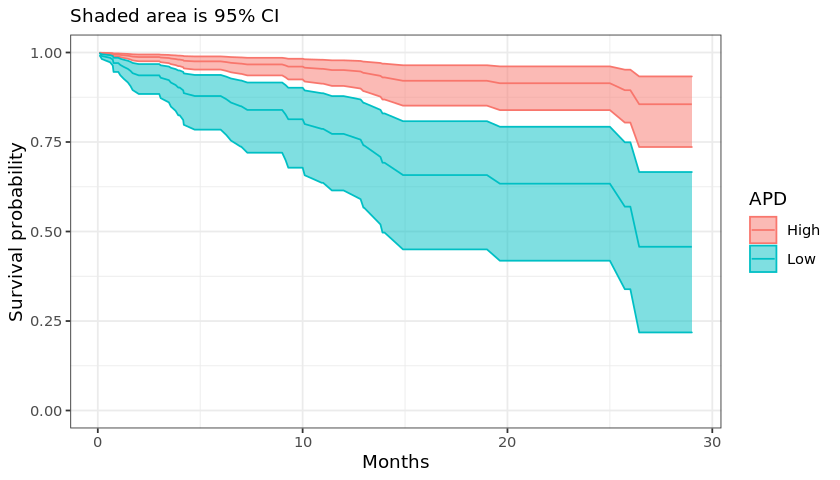

In [7]:
options(repr.plot.width=7, repr.plot.height=4)
gg_km = ggplot(filter(df_km,tt!='KM'),aes(x=time,y=mu,color=tt,fill=tt)) + 
  theme_bw() + geom_line() + 
  labs(y='Survival probability',x='Months',subtitle = 'Shaded area is 95% CI') + 
  scale_color_discrete(name='APD') +
  scale_fill_discrete(name='APD') +
  geom_ribbon(aes(ymin=lb,ymax=ub),alpha=0.5) + 
  scale_y_continuous(limits=c(0,1))
gg_km